In [139]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score

In [140]:
df=pd.read_csv("/Users/fasilck/Downloads/winequality-red.csv")

In [141]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [142]:
df.shape

(1599, 12)

In [143]:
df.info()##here we can see there is no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [144]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


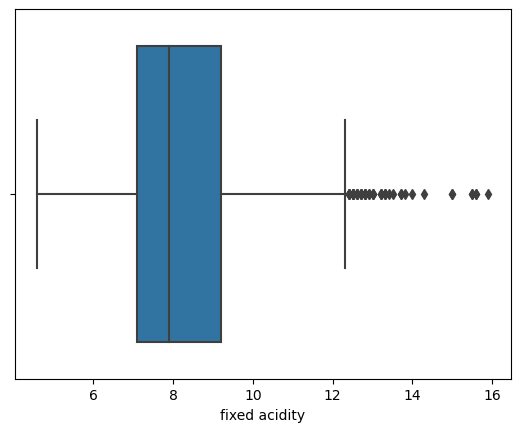

<Figure size 200x200 with 0 Axes>

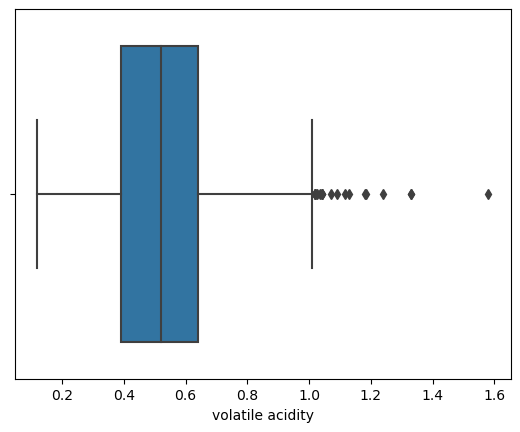

<Figure size 200x200 with 0 Axes>

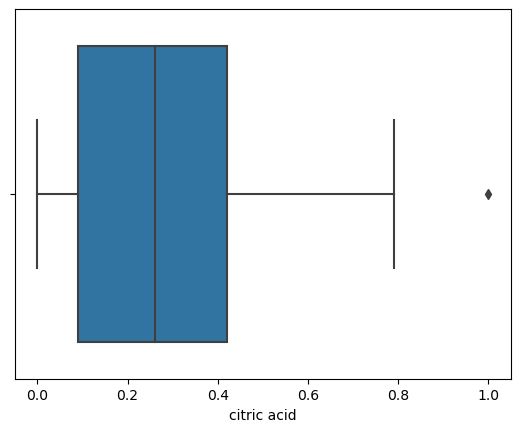

<Figure size 200x200 with 0 Axes>

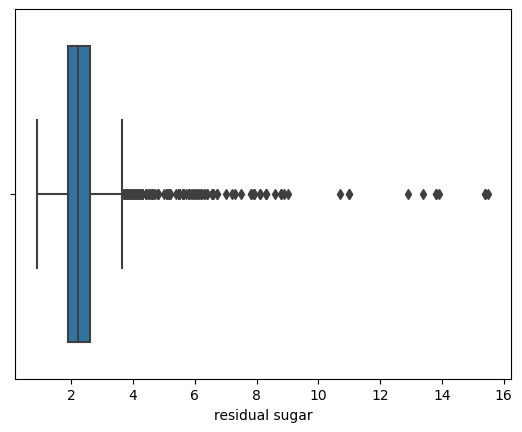

<Figure size 200x200 with 0 Axes>

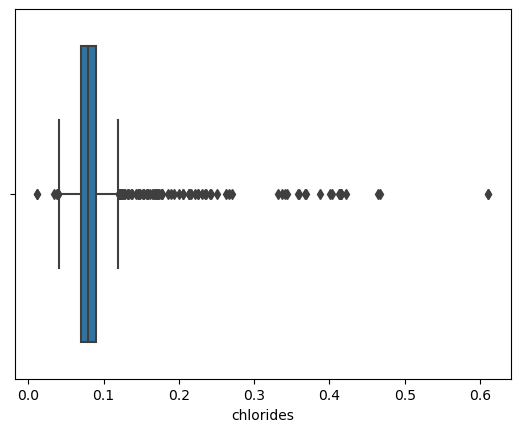

<Figure size 200x200 with 0 Axes>

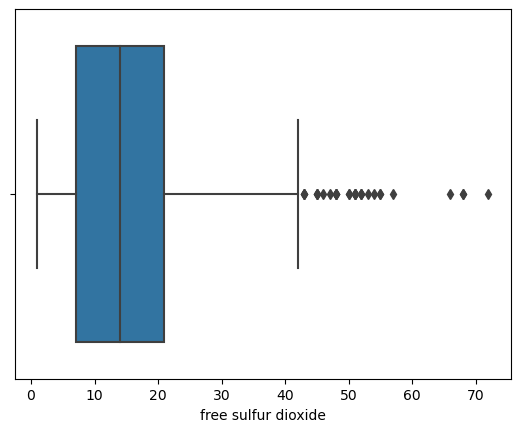

<Figure size 200x200 with 0 Axes>

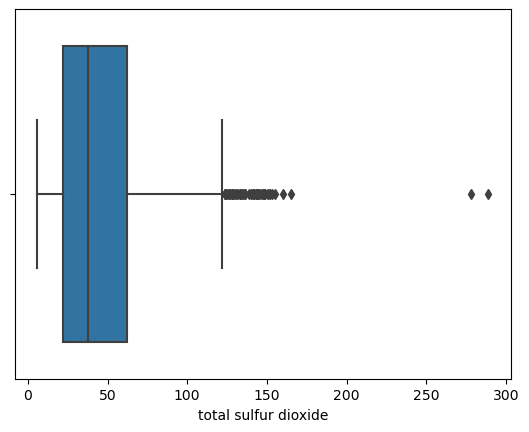

<Figure size 200x200 with 0 Axes>

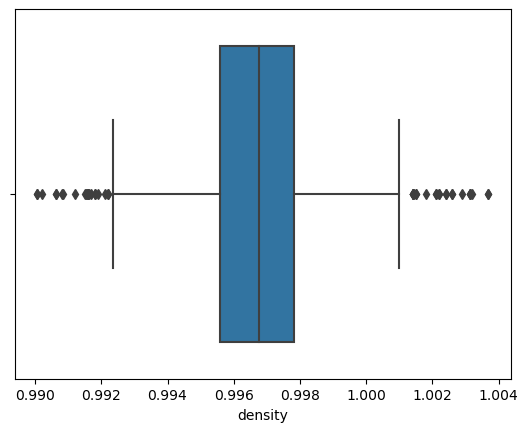

<Figure size 200x200 with 0 Axes>

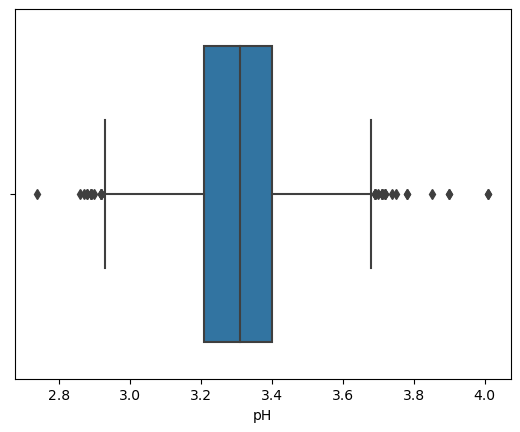

<Figure size 200x200 with 0 Axes>

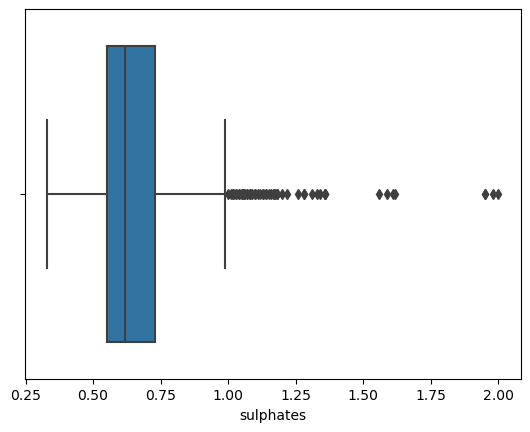

<Figure size 200x200 with 0 Axes>

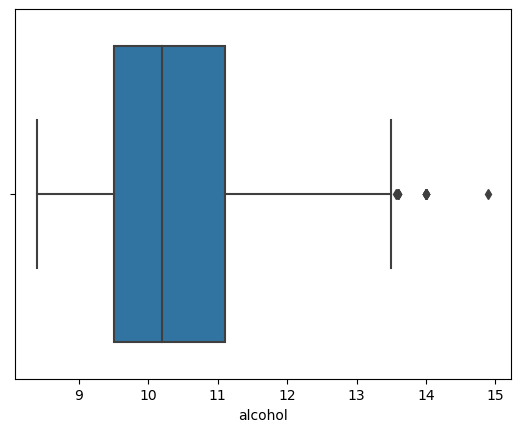

<Figure size 200x200 with 0 Axes>

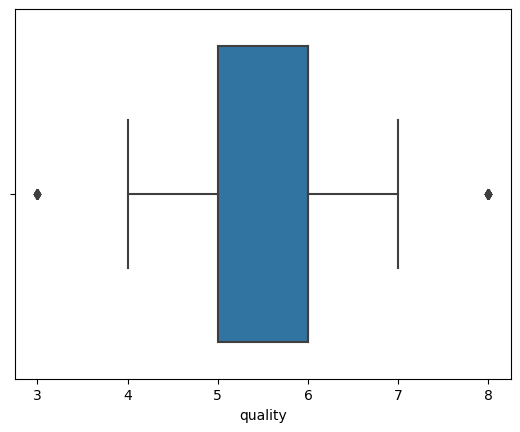

<Figure size 200x200 with 0 Axes>

In [145]:
##to check for outliers
for column in df.columns:
    sb.boxplot(df[column])
    plt.figure(figsize=(2,2))
    plt.show()

In [146]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

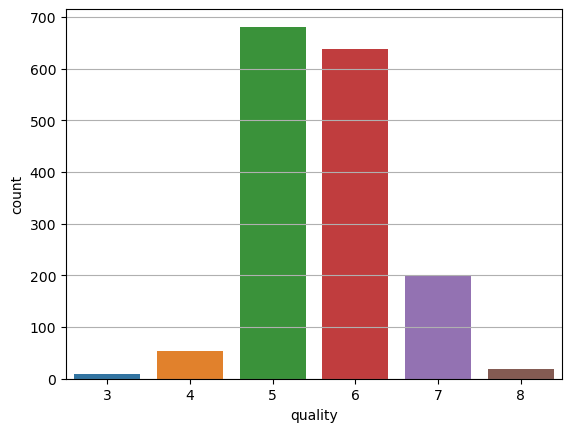

In [147]:
plt.grid()
sb.countplot(df["quality"])

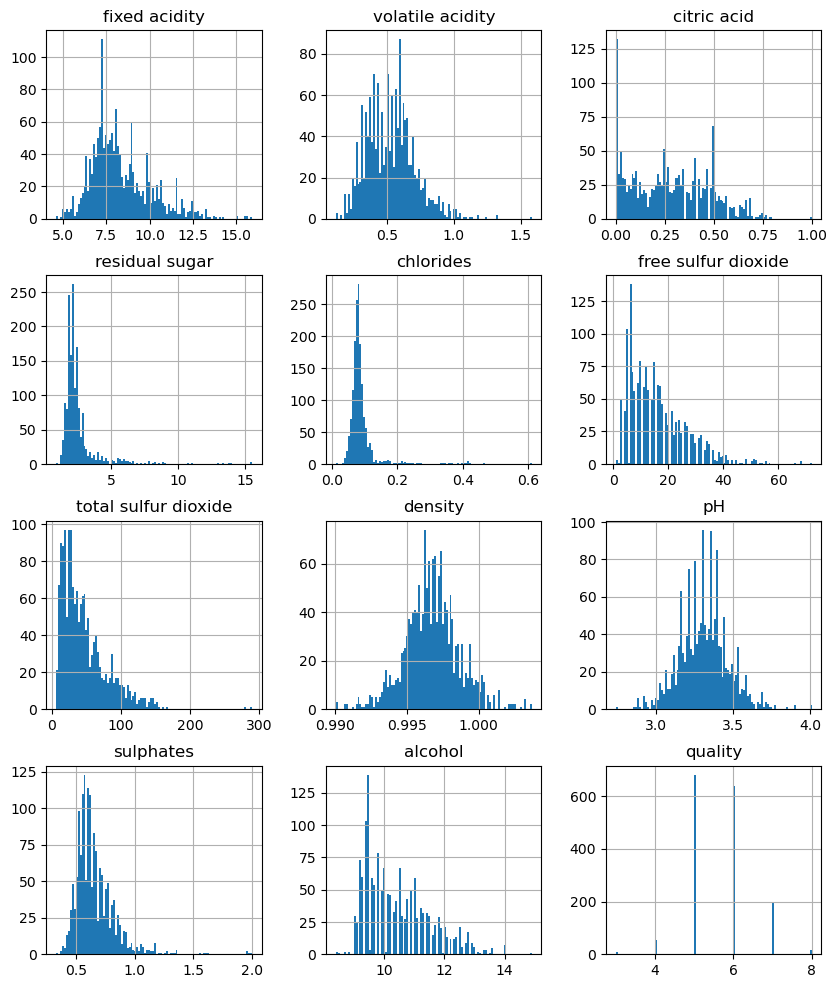

In [148]:
df.hist(bins=100, figsize=(10,12))
plt.show()

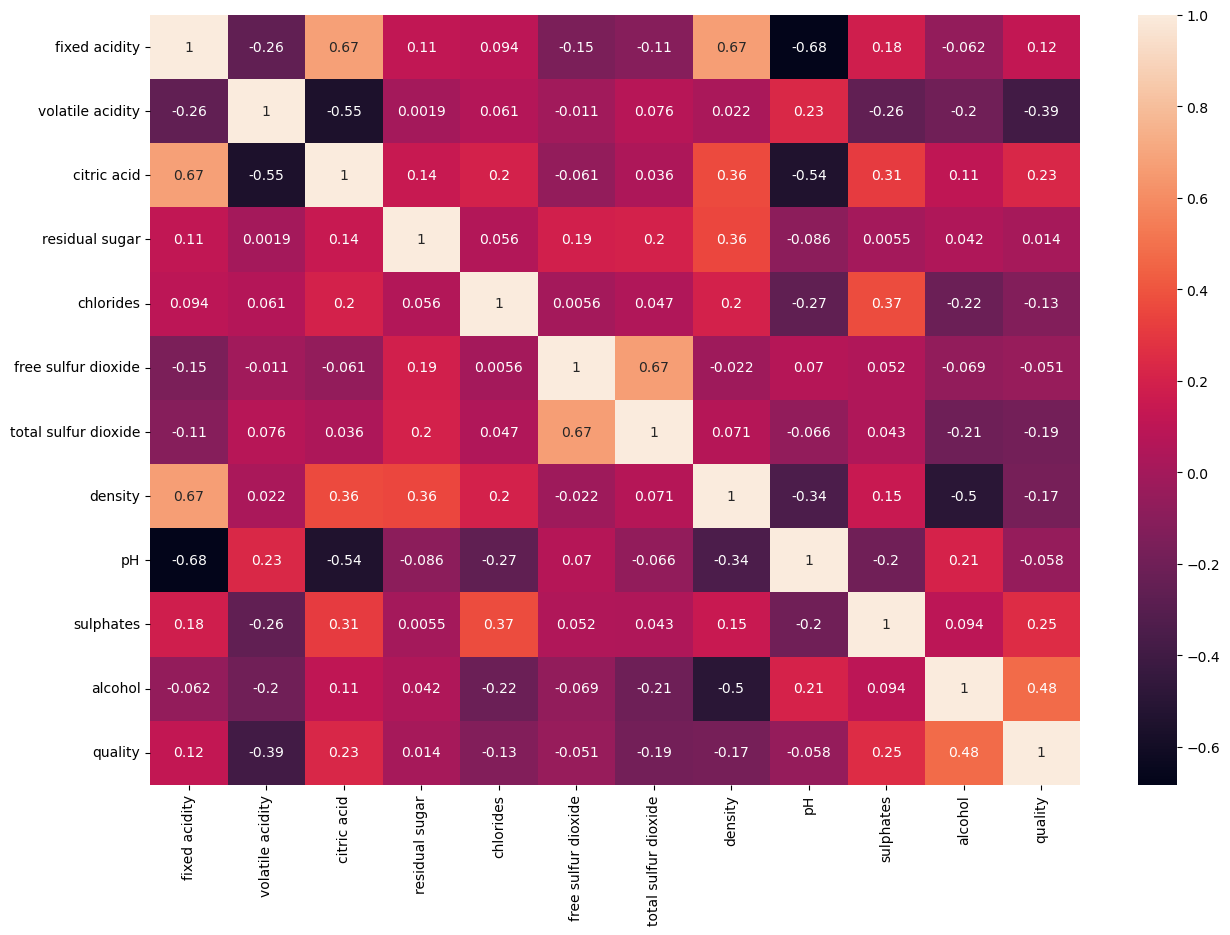

In [149]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True)
plt.show()

In [150]:
df.corr()["quality"].sort_values()# here we can observe residual sugar has no correlation with target.we can remove it

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [158]:
df=df.drop("residual sugar",axis=1)

In [159]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [152]:
df["quality"]=df["quality"].apply(lambda x: 1 if x>6.5 else 0)

In [153]:
df["quality"]

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

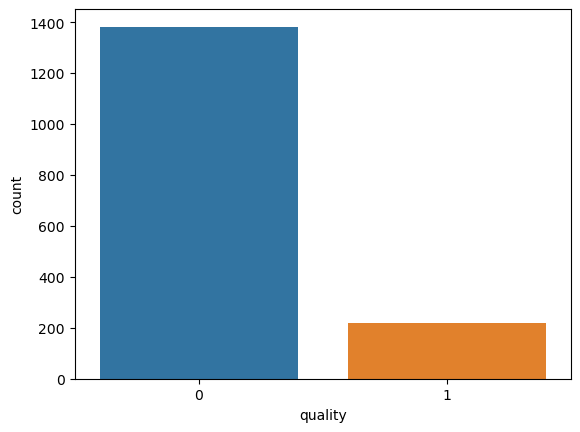

In [154]:
sb.countplot(df["quality"])

In [160]:
df["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [161]:
x=df.iloc[:,:-1]
y=df["quality"]

In [162]:
x.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [164]:
from sklearn.preprocessing import StandardScaler
scaled_df=StandardScaler()
x_train=scaled_df.fit_transform(x_train)
x_test=scaled_df.transform(x_test)

In [165]:
x_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [166]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
obj=model.fit(x_train,y_train)

In [167]:
pred=obj.predict(x_test)

In [168]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [169]:
from sklearn.metrics import accuracy_score
score=accuracy_score(pred,y_test)
print(score)

0.8604166666666667


In [170]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       413
           1       0.50      0.28      0.36        67

    accuracy                           0.86       480
   macro avg       0.70      0.62      0.64       480
weighted avg       0.84      0.86      0.84       480



In [174]:
c=confusion_matrix(y_test,pred)

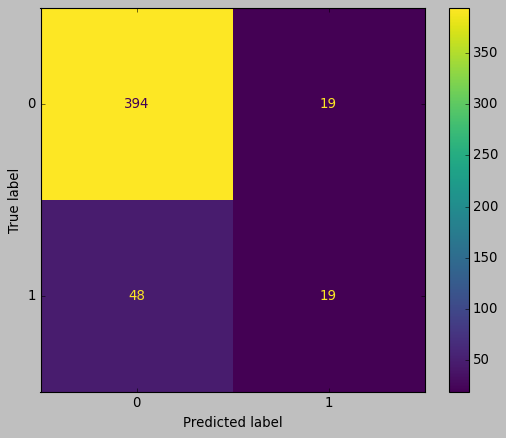

In [179]:
from matplotlib import style
style.use("classic")
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=c)
disp.plot()

In [185]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model=model.fit(x_train,y_train)

In [ ]:
from sklearn.

In [186]:
y_pred=model.predict(x_test)

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [188]:
accuracy
precision

0.8838177083333333

In [189]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8729166666666667
Precision: 0.8838177083333333
Recall: 0.8729166666666667
F1 Score: 0.8775199563220121


In [190]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [192]:
pred_rf=model.predict(x_test)

In [193]:
score=accuracy_score(pred_rf,y_test)

In [194]:
score

0.8770833333333333

### tuning randomforestclassifier

In [200]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, x_train, y_train, cv=10)

In [201]:
scores.mean()

0.9204794079794079